In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
from diffusers import UNet3DConditionModel
from diffusion import DiffusionModel3D

# Create a 3D model
model = UNet3DConditionModel(
    sample_size=32,  # the target resolution (assuming 32x32x32 voxels)
    in_channels=1,  # number of input channels, 1 for voxel data
    out_channels=1,  # number of output channels
    layers_per_block=2,  # how many ResNet layers to use per UNet block
    block_out_channels=(64, 128, 256, 512),  # channel numbers for each block
    down_block_types=(
        "CrossAttnDownBlock3D",  # a downsampling block with cross-attention
        "CrossAttnDownBlock3D",
        "CrossAttnDownBlock3D",
        "DownBlock3D",  # a regular downsampling block without attention
    ),
    up_block_types=(
        "UpBlock3D",  # a regular upsampling block without attention
        "CrossAttnUpBlock3D",  # an upsampling block with cross-attention
        "CrossAttnUpBlock3D",
        "CrossAttnUpBlock3D",
    ),
    cross_attention_dim=512,  # dimension of the cross attention features
)
model.to(device)

diffusion_model = DiffusionModel3D(model, num_timesteps=1000)
diffusion_model.to(device)

# Print model summary
print(diffusion_model)
print(f"Total parameters: {sum(p.numel() for p in diffusion_model.parameters())}")

DiffusionModel3D(
  (model): UNet3DConditionModel(
    (conv_in): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (time_proj): Timesteps()
    (time_embedding): TimestepEmbedding(
      (linear_1): Linear(in_features=64, out_features=256, bias=True)
      (act): SiLU()
      (linear_2): Linear(in_features=256, out_features=256, bias=True)
    )
    (transformer_in): TransformerTemporalModel(
      (norm): GroupNorm(32, 64, eps=1e-06, affine=True)
      (proj_in): Linear(in_features=64, out_features=512, bias=True)
      (transformer_blocks): ModuleList(
        (0): BasicTransformerBlock(
          (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (attn1): Attention(
            (to_q): Linear(in_features=512, out_features=512, bias=False)
            (to_k): Linear(in_features=512, out_features=512, bias=False)
            (to_v): Linear(in_features=512, out_features=512, bias=False)
            (to_out): ModuleList(
              (0): Linea

/scratch/students/2024-fall-sp-pabdel/3D-BlockGen/diffusion.py:12: FutureWarning: Accessing config attribute `cross_attention_dim` directly via 'UNet3DConditionModel' object attribute is deprecated. Please access 'cross_attention_dim' over 'UNet3DConditionModel's config object instead, e.g. 'unet.config.cross_attention_dim'.
  self.dummy_encoder = nn.Parameter(torch.zeros(1, 1, model.cross_attention_dim), requires_grad=False)


In [5]:
# Import your data loader (assumed to be defined in a separate file)
from data_loader import create_dataloader

# Create training and testing dataloaders
batch_size = 3  # Adjust as necessary for memory
data_dir = "./objaverse_processed/processed_models"  # Replace with actual data directory
train_dataloader, test_dataloader = create_dataloader(data_dir, batch_size=batch_size)

print(f"Train dataset size: {len(train_dataloader.dataset)}")
print(f"Test dataset size: {len(test_dataloader.dataset)}")

Loading data from ./objaverse_processed/processed_models...
Found 1000 files in ./objaverse_processed/processed_models
Train dataset size: 900
Test dataset size: 100


In [6]:
from training import train_diffusion_model

losses, test_losses = train_diffusion_model(diffusion_model, train_dataloader, test_dataloader, epochs=30, device=device)

Epoch 1/30 - Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:32<00:00,  1.31s/it]


Epoch [1/30], Training Loss: 0.03169756151425342, LR: 0.000100


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.74it/s]


Test Loss: 0.0108
Saved best model at epoch 1 with Test Loss: 0.0108
Saved latest model at epoch 1


Epoch 2/30 - Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:41<00:00,  1.34s/it]


Epoch [2/30], Training Loss: 0.010401593534043059, LR: 0.000099


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.74it/s]


Test Loss: 0.0109
Saved latest model at epoch 2


Epoch 3/30 - Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:37<00:00,  1.32s/it]


Epoch [3/30], Training Loss: 0.010056835739330078, LR: 0.000098


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.80it/s]


Test Loss: 0.0085
Saved best model at epoch 3 with Test Loss: 0.0085
Saved latest model at epoch 3


Epoch 4/30 - Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:46<00:00,  1.36s/it]


Epoch [4/30], Training Loss: 0.005851891869679093, LR: 0.000096


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.67it/s]


Test Loss: 0.0127
Saved latest model at epoch 4


Epoch 5/30 - Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:52<00:00,  1.37s/it]


Epoch [5/30], Training Loss: 0.004516208283409166, LR: 0.000093


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.64it/s]


Test Loss: 0.0037
Saved best model at epoch 5 with Test Loss: 0.0037
Saved latest model at epoch 5


Epoch 6/30 - Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:56<00:00,  1.39s/it]


Epoch [6/30], Training Loss: 0.0028072327132880066, LR: 0.000091


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.65it/s]


Test Loss: 0.0029
Saved best model at epoch 6 with Test Loss: 0.0029
Saved latest model at epoch 6


Epoch 7/30 - Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:50<00:00,  1.37s/it]


Epoch [7/30], Training Loss: 0.00362511927591792, LR: 0.000087


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.72it/s]


Test Loss: 0.0095
Saved latest model at epoch 7


Epoch 8/30 - Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:49<00:00,  1.36s/it]


Epoch [8/30], Training Loss: 0.0022059217345668, LR: 0.000084


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.72it/s]


Test Loss: 0.0022
Saved best model at epoch 8 with Test Loss: 0.0022
Saved latest model at epoch 8


Epoch 9/30 - Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:49<00:00,  1.37s/it]


Epoch [9/30], Training Loss: 0.00236063490776966, LR: 0.000080


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.72it/s]


Test Loss: 0.0017
Saved best model at epoch 9 with Test Loss: 0.0017
Saved latest model at epoch 9


Epoch 10/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:48<00:00,  1.36s/it]


Epoch [10/30], Training Loss: 0.0014890198307693937, LR: 0.000075


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.74it/s]


Test Loss: 0.0051
Saved latest model at epoch 10


Epoch 11/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:48<00:00,  1.36s/it]


Epoch [11/30], Training Loss: 0.0015280160998615126, LR: 0.000071


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.74it/s]


Test Loss: 0.0006
Saved best model at epoch 11 with Test Loss: 0.0006
Saved latest model at epoch 11


Epoch 12/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:49<00:00,  1.37s/it]


Epoch [12/30], Training Loss: 0.0013985263923435318, LR: 0.000066


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.71it/s]


Test Loss: 0.0013
Saved latest model at epoch 12


Epoch 13/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:51<00:00,  1.37s/it]


Epoch [13/30], Training Loss: 0.0009641060665308032, LR: 0.000061


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.71it/s]


Test Loss: 0.0034
Saved latest model at epoch 13


Epoch 14/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:49<00:00,  1.36s/it]


Epoch [14/30], Training Loss: 0.0017240838723470613, LR: 0.000056


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.72it/s]


Test Loss: 0.0004
Saved best model at epoch 14 with Test Loss: 0.0004
Saved latest model at epoch 14


Epoch 15/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:49<00:00,  1.36s/it]


Epoch [15/30], Training Loss: 0.0006200207710692969, LR: 0.000051


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.72it/s]


Test Loss: 0.0005
Saved latest model at epoch 15


Epoch 16/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:52<00:00,  1.37s/it]


Epoch [16/30], Training Loss: 0.0009514911557198503, LR: 0.000045


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.70it/s]


Test Loss: 0.0014
Saved latest model at epoch 16


Epoch 17/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:50<00:00,  1.37s/it]


Epoch [17/30], Training Loss: 0.0007866453335251814, LR: 0.000040


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.75it/s]


Test Loss: 0.0004
Saved best model at epoch 17 with Test Loss: 0.0004
Saved latest model at epoch 17


Epoch 18/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:50<00:00,  1.37s/it]


Epoch [18/30], Training Loss: 0.00036118603398790585, LR: 0.000035


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.75it/s]


Test Loss: 0.0003
Saved best model at epoch 18 with Test Loss: 0.0003
Saved latest model at epoch 18


Epoch 19/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:50<00:00,  1.37s/it]


Epoch [19/30], Training Loss: 0.0006032104882857918, LR: 0.000030


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.69it/s]


Test Loss: 0.0004
Saved latest model at epoch 19


Epoch 20/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:50<00:00,  1.37s/it]


Epoch [20/30], Training Loss: 0.00033620541643661757, LR: 0.000026


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.72it/s]


Test Loss: 0.0003
Saved best model at epoch 20 with Test Loss: 0.0003
Saved latest model at epoch 20


Epoch 21/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:54<00:00,  1.38s/it]


Epoch [21/30], Training Loss: 0.0005623663055545573, LR: 0.000021


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.67it/s]


Test Loss: 0.0002
Saved best model at epoch 21 with Test Loss: 0.0002
Saved latest model at epoch 21


Epoch 22/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:47<00:00,  1.36s/it]


Epoch [22/30], Training Loss: 0.000399338225882578, LR: 0.000017


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.70it/s]


Test Loss: 0.0003
Saved latest model at epoch 22


Epoch 23/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:52<00:00,  1.37s/it]


Epoch [23/30], Training Loss: 0.00029973311582580207, LR: 0.000014


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.71it/s]


Test Loss: 0.0005
Saved latest model at epoch 23


Epoch 24/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:49<00:00,  1.37s/it]


Epoch [24/30], Training Loss: 0.00028291827203550686, LR: 0.000010


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.69it/s]


Test Loss: 0.0002
Saved best model at epoch 24 with Test Loss: 0.0002
Saved latest model at epoch 24


Epoch 25/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:51<00:00,  1.37s/it]


Epoch [25/30], Training Loss: 0.000348254025229835, LR: 0.000008


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.65it/s]


Test Loss: 0.0005
Saved latest model at epoch 25


Epoch 26/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:49<00:00,  1.37s/it]


Epoch [26/30], Training Loss: 0.00031207384439767337, LR: 0.000005


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.74it/s]


Test Loss: 0.0002
Saved latest model at epoch 26


Epoch 27/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:49<00:00,  1.37s/it]


Epoch [27/30], Training Loss: 0.0001951355950101667, LR: 0.000003


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.75it/s]


Test Loss: 0.0002
Saved latest model at epoch 27


Epoch 28/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:46<00:00,  1.36s/it]


Epoch [28/30], Training Loss: 0.0002038665803653809, LR: 0.000002


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.73it/s]


Test Loss: 0.0001
Saved best model at epoch 28 with Test Loss: 0.0001
Saved latest model at epoch 28


Epoch 29/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:48<00:00,  1.36s/it]


Epoch [29/30], Training Loss: 0.00018316389353761526, LR: 0.000001


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.73it/s]


Test Loss: 0.0001
Saved best model at epoch 29 with Test Loss: 0.0001
Saved latest model at epoch 29


Epoch 30/30 - Training: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [06:46<00:00,  1.36s/it]


Epoch [30/30], Training Loss: 0.00019143615444287812, LR: 0.000001


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:12<00:00,  2.72it/s]


Test Loss: 0.0002
Saved latest model at epoch 30


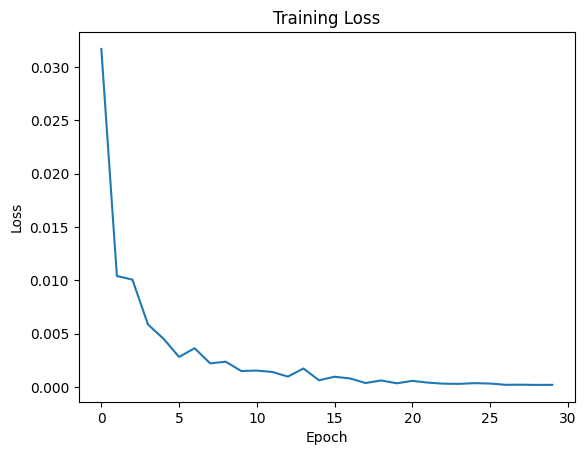

In [7]:
# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


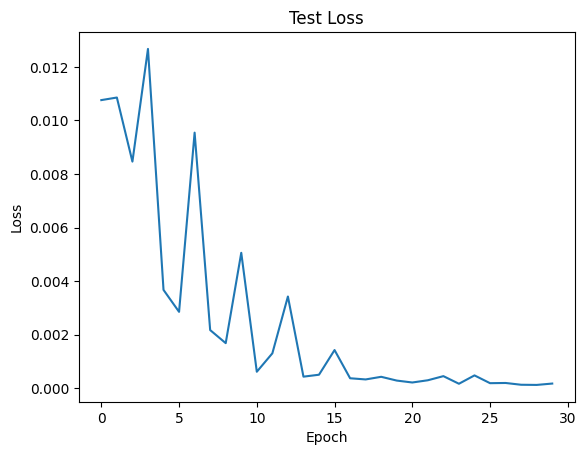

In [8]:
# Plot the test loss
plt.plot(test_losses)
plt.title("Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Sampling Steps: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:13<00:00,  3.94it/s]


(2, 1, 32, 32, 32)


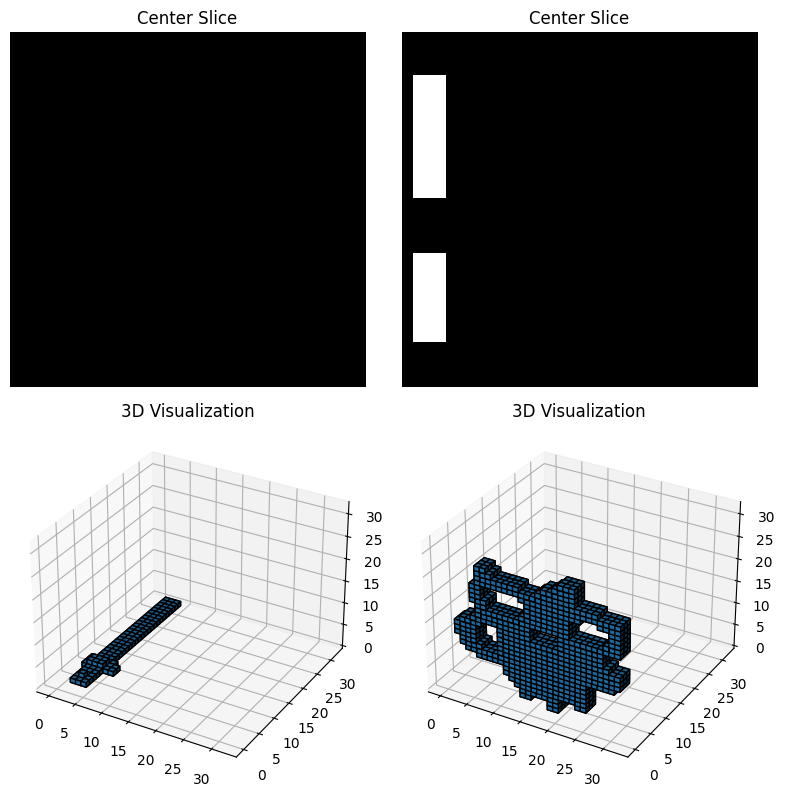

In [6]:
from inference import DiffusionInference3D
from diffusers import DDIMScheduler


diffusion_model = DiffusionModel3D(model, num_timesteps=1000)

diffusion_model.load_state_dict(torch.load("./best_model.pth"))

diffusion_model.to(device)

# noise_scheduler = DDIMScheduler.from_config(diffusion_model.noise_scheduler.config, timestep_spacing="trailing")

# inference = DiffusionInference3D(diffusion_model, noise_scheduler, device=device)
# samples = inference.sample_ddim(num_samples=2, image_size=(32, 32, 32), num_inference_steps = 200, intermediate_visualisation=True)


inference = DiffusionInference3D(diffusion_model, diffusion_model.noise_scheduler, device=device)
samples = inference.sample(num_samples=2, image_size=(32, 32, 32), show_intermediate=False)

inference.visualize_samples(samples, threshold=0.5)
